In [1]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
import nltk
import spacy

nltk.download('punkt')

nlp = spacy.load('ro_core_news_sm')
import matplotlib.pyplot as plt
from sklearn.utils import resample


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ilinc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
categoryIndex = {
    'agriculture' :1,
    'cultural' : 2,
    'parenting' : 3,
    'sport' : 4,
    'travel' : 5
}

ro_df = pd.DataFrame(columns=['category','siteIdx', 'text'])

ro_df_agriculture = pd.read_csv('RO/agricultureRo.csv')
ro_df_agriculture['category'] = categoryIndex['agriculture']
ro_df = pd.concat([ro_df[['category', 'siteIdx', 'text']], ro_df_agriculture[['category', 'siteIdx', 'text']]], ignore_index=True)

ro_df_cultural = pd.read_csv('RO/culturalRo.csv')
ro_df_cultural['category'] = categoryIndex['cultural']
ro_df = pd.concat([ro_df[['category', 'siteIdx', 'text']], ro_df_cultural[['category', 'siteIdx', 'text']]], ignore_index=True)

ro_df_parenting = pd.read_csv('RO/parentingRo.csv')
ro_df_parenting['category'] = categoryIndex['parenting']
ro_df = pd.concat([ro_df[['category', 'siteIdx', 'text']], ro_df_parenting[['category', 'siteIdx', 'text']]], ignore_index=True)

ro_df_sport = pd.read_csv('RO/sportRo.csv')
ro_df_sport['category'] = categoryIndex['sport']
ro_df = pd.concat([ro_df[['category', 'siteIdx', 'text']], ro_df_sport[['category', 'siteIdx', 'text']]], ignore_index=True)

ro_df_travel = pd.read_csv('RO/travelRo.csv')
ro_df_travel['category'] = categoryIndex['travel']
ro_df = pd.concat([ro_df[['category', 'siteIdx', 'text']], ro_df_travel[['category', 'siteIdx', 'text']]], ignore_index=True)

ro_df.to_csv('RomanianTexts.csv', index=False)

md_df = pd.DataFrame(columns=['category','siteIdx', 'text'])

md_df_agriculture = pd.read_csv('MD/agricultureMd.csv')
md_df_agriculture['category'] = categoryIndex['agriculture']
md_df = pd.concat([md_df[['category', 'siteIdx', 'text']], md_df_agriculture[['category', 'siteIdx', 'text']]], ignore_index=True)

md_df_cultural = pd.read_csv('MD/culturalMd.csv')
md_df_cultural['category'] = categoryIndex['cultural']
md_df = pd.concat([md_df[['category', 'siteIdx', 'text']], md_df_cultural[['category', 'siteIdx', 'text']]], ignore_index=True)

md_df_parenting = pd.read_csv('MD/parentingMd.csv')
md_df_parenting['category'] = categoryIndex['parenting']
md_df = pd.concat([md_df[['category', 'siteIdx', 'text']], md_df_parenting[['category', 'siteIdx', 'text']]], ignore_index=True)

md_df_sport = pd.read_csv('MD/sportMd.csv')
md_df_sport['category'] = categoryIndex['sport']
md_df = pd.concat([md_df[['category', 'siteIdx', 'text']], md_df_sport[['category', 'siteIdx', 'text']]], ignore_index=True)

md_df_travel = pd.read_csv('MD/travelMd.csv')
md_df_travel['category'] = categoryIndex['travel']
md_df = pd.concat([md_df[['category', 'siteIdx', 'text']], md_df_travel[['category', 'siteIdx', 'text']]], ignore_index=True)
md_df.to_csv('MoldovanTexts.csv', index=False)

In [3]:
def calculate_ttr(chunk):
    tokens = word_tokenize(chunk) 
    types = set(tokens)   
    ttr = len(types) / len(tokens)
    return ttr

def ttr_array(df):
    all_sentences = []
    for index, article in df.iterrows():
        doc = nlp(article['text'])
        sentences = [sent.text for sent in doc.sents]
        for sentence in sentences:
            all_sentences.append(sentence)
    np.random.shuffle(all_sentences)
    concatenated_string = ' '.join(all_sentences)
    words = word_tokenize(concatenated_string)
    filtered_words = [word.lower() for word in words if word.isalpha()]
    words_500 = []
    i = 0
    while i < len(filtered_words):
        group = filtered_words[i: i + 500] 
        words_500.append(' '.join(group))  
        i += 500                            

    ttr_values = [calculate_ttr(chunk) for chunk in words_500]
    return ttr_values

In [4]:
ttr_ro = []
ttr_ro.append(ttr_array(ro_df_agriculture))
ttr_ro.append(ttr_array(ro_df_cultural))
ttr_ro.append(ttr_array(ro_df_parenting))
ttr_ro.append(ttr_array(ro_df_sport))
ttr_ro.append(ttr_array(ro_df_travel))

In [5]:
ttr_md = []
ttr_md.append(ttr_array(md_df_agriculture))
ttr_md.append(ttr_array(md_df_cultural))
ttr_md.append(ttr_array(md_df_parenting))
ttr_md.append(ttr_array(md_df_sport))
ttr_md.append(ttr_array(md_df_travel))

idx 0 inainte de downsampling ro: 534 md:382
idx 0 dupa downsampling ro: 382 md:382
idx 1 inainte de downsampling ro: 756 md:570
idx 1 dupa downsampling ro: 570 md:570
idx 2 inainte de downsampling ro: 610 md:398
idx 2 dupa downsampling ro: 398 md:398
idx 3 inainte de downsampling ro: 478 md:264
idx 3 dupa downsampling ro: 264 md:264
idx 4 inainte de downsampling ro: 778 md:430
idx 4 dupa downsampling ro: 430 md:430


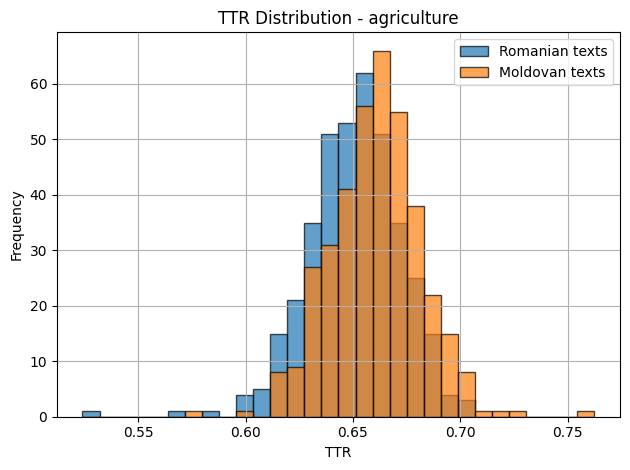

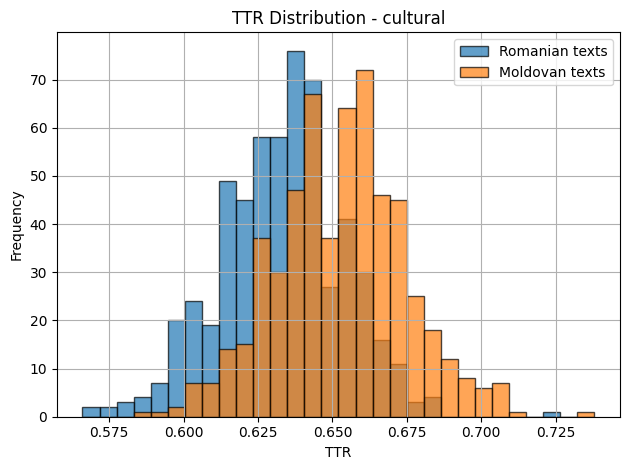

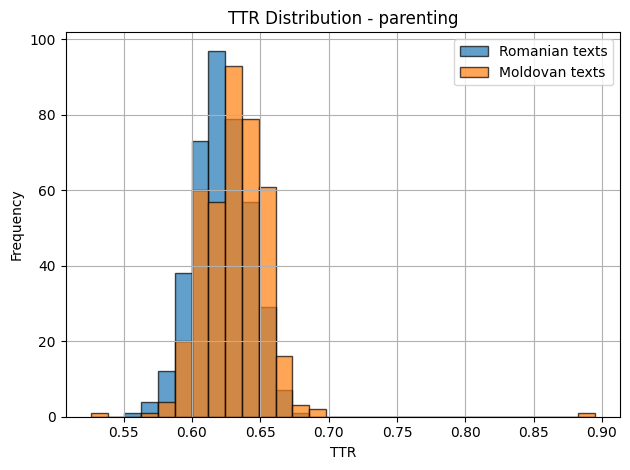

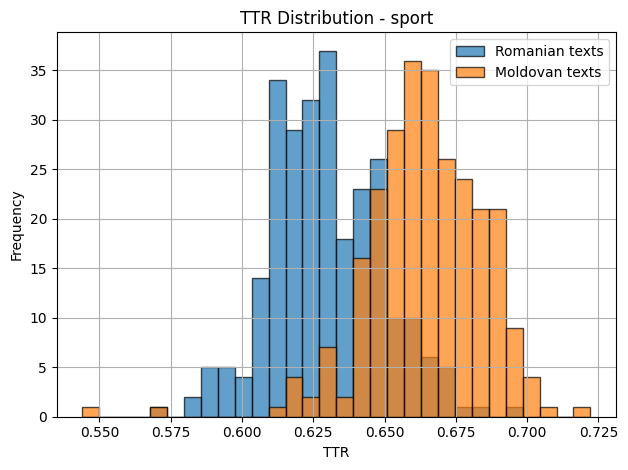

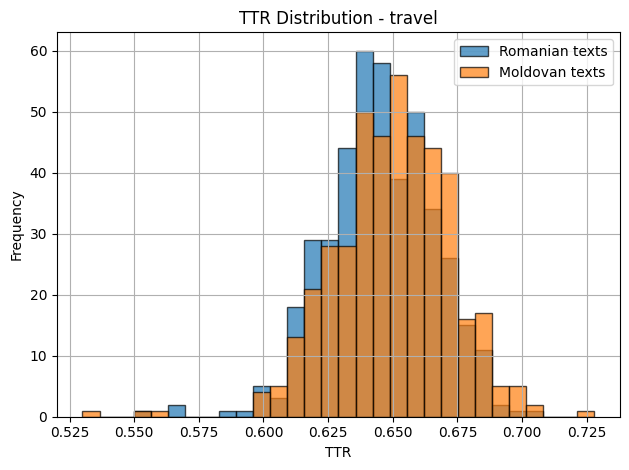

In [6]:
ttr_md_downsampled = []
ttr_ro_downsampled = []
for idx, (category, catIdx) in enumerate(categoryIndex.items()):
    categorial_ro_df = pd.DataFrame({'value': ttr_ro[idx]})
    categorial_md_df = pd.DataFrame({'value': ttr_md[idx]})

    print(f"idx {idx} inainte de downsampling ro: {len(categorial_ro_df)} md:{len(categorial_md_df)}")
    md_size = len(categorial_md_df)
    ro_size = len(categorial_ro_df)
    if md_size > ro_size:
        categorial_md_df = categorial_md_df.sample(n=ro_size, random_state=17)
        ttr_md_downsampled.append(categorial_md_df['value'].tolist())
        ttr_ro_downsampled.append(ttr_ro[idx])

    else:
        categorial_ro_df = categorial_ro_df.sample(n=md_size, random_state=17)
        ttr_ro_downsampled.append(categorial_ro_df['value'].tolist())
        ttr_md_downsampled.append(ttr_md[idx])

    print(f"idx {idx} dupa downsampling ro: {len(ttr_ro_downsampled[idx])} md:{len(ttr_md_downsampled[idx])}")

# Plotting
for idx, (category, catIdx) in enumerate(categoryIndex.items()):
    all_values = ttr_ro_downsampled[idx] + ttr_md_downsampled[idx]
    bin_edges = np.histogram_bin_edges(all_values, bins=30)

    plt.hist(ttr_ro_downsampled[idx], bins=bin_edges, edgecolor='black', alpha=0.7, label='Romanian texts')
    plt.hist(ttr_md_downsampled[idx], bins=bin_edges, edgecolor='black', alpha=0.7, label='Moldovan texts')

    plt.title(f'TTR Distribution - {category}')
    plt.xlabel('TTR')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [8]:
def permutation_test(data1, data2, num_permutations=10000):
    combined = np.concatenate((data1, data2))
    observed_diff = np.mean(data1) - np.mean(data2)
    count = 0
    
    permuted_diffs = []
    
    for _ in range(num_permutations):
        np.random.shuffle(combined)
        permuted_data1 = combined[:len(data1)]
        permuted_data2 = combined[len(data1):]
        permuted_diff = np.mean(permuted_data1) - np.mean(permuted_data2)
        permuted_diffs.append(permuted_diff)
        if np.abs(permuted_diff) >= np.abs(observed_diff):
            count += 1

    p_value = count / num_permutations
    
    print(f'Observed difference: {observed_diff}')
    print(f'Min permuted difference: {np.min(np.abs(permuted_diffs))}')
    print(f'Max permuted difference: {np.max(np.abs(permuted_diffs))}')
    print(f'Mean permuted difference: {np.mean(np.abs(permuted_diffs))}')
    
    return p_value

for i in range(0,5):
    p_value = permutation_test(ttr_ro_downsampled[i], ttr_md_downsampled[i], num_permutations=10000)
    print(f'p-value: {p_value}')


Observed difference: -0.009959424083769708
Min permuted difference: 1.3089005234112605e-06
Max permuted difference: 0.006011780104711928
Mean permuted difference: 0.0012685178010471223
p-value: 0.0
Observed difference: -0.019755839717700008
Min permuted difference: 1.4537527877056533e-06
Max permuted difference: 0.005421609523380222
Mean permuted difference: 0.0011039883716748927
p-value: 0.0
Observed difference: -0.009715419201269504
Min permuted difference: 3.17376355452037e-06
Max permuted difference: 0.00753451467865629
Mean permuted difference: 0.0013339014546416318
p-value: 0.0
Observed difference: -0.035194138353229265
Min permuted difference: 2.831343740350434e-06
Max permuted difference: 0.009639194980104238
Mean permuted difference: 0.0018718961126415678
p-value: 0.0
Observed difference: -0.0048644634842922585
Min permuted difference: 6.52794777455945e-07
Max permuted difference: 0.005842513259893933
Mean permuted difference: 0.0011818080946552432
p-value: 0.0007
